## 데이터 받아오기 

In [2]:
import pandas as pd

terror_data = pd.read_csv("../../../../Downloads/globalterrorismdb_0718dist.csv", encoding_errors="ignore")
terror_data

/tmp/ipykernel_23727/2422249770.py:3: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  terror_data = pd.read_csv("../../../../Downloads/globalterrorismdb_0718dist.csv", encoding_errors="ignore")


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


# step1 

- success를 테러 횟수로 잡고 테러 건수 연도별 집계화

In [83]:
import numpy as np
step1_df = terror_data[['iyear', 'success']]
step1_pivot = pd.pivot_table(data = step1_df, index  = 'iyear', aggfunc = np.sum)

- 증가율 컬럼 추가

In [84]:
step1_pivot

,success
iyear,
1970,549
1971,420
1972,452
1973,433
1974,545
1975,705
1976,861
1977,1191
1978,1411


In [85]:
increment = []
for idx in range(0,len(step1_pivot)-1):
   increment.append(step1_pivot.iloc[idx+1]/step1_pivot.iloc[idx])
increment.append(1)
step1_pivot["증가율"] = increment
step1_pivot

,success,증가율
iyear,,
1970,549,success 0.765027 dtype: float64
1971,420,success 1.07619 dtype: float64
1972,452,success 0.957965 dtype: float64
1973,433,success 1.258661 dtype: float64
1974,545,success 1.293578 dtype: float64
1975,705,success 1.221277 dtype: float64
1976,861,success 1.383275 dtype: float64
1977,1191,success 1.184719 dtype: float64
1978,1411,success 1.706591 dtype: float64


- 시각화

In [86]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


/home/soomin/venv/eda_venv/lib/python3.10/site-packages/matplotlib/collections.py:192: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  offsets = np.asanyarray(offsets, float)


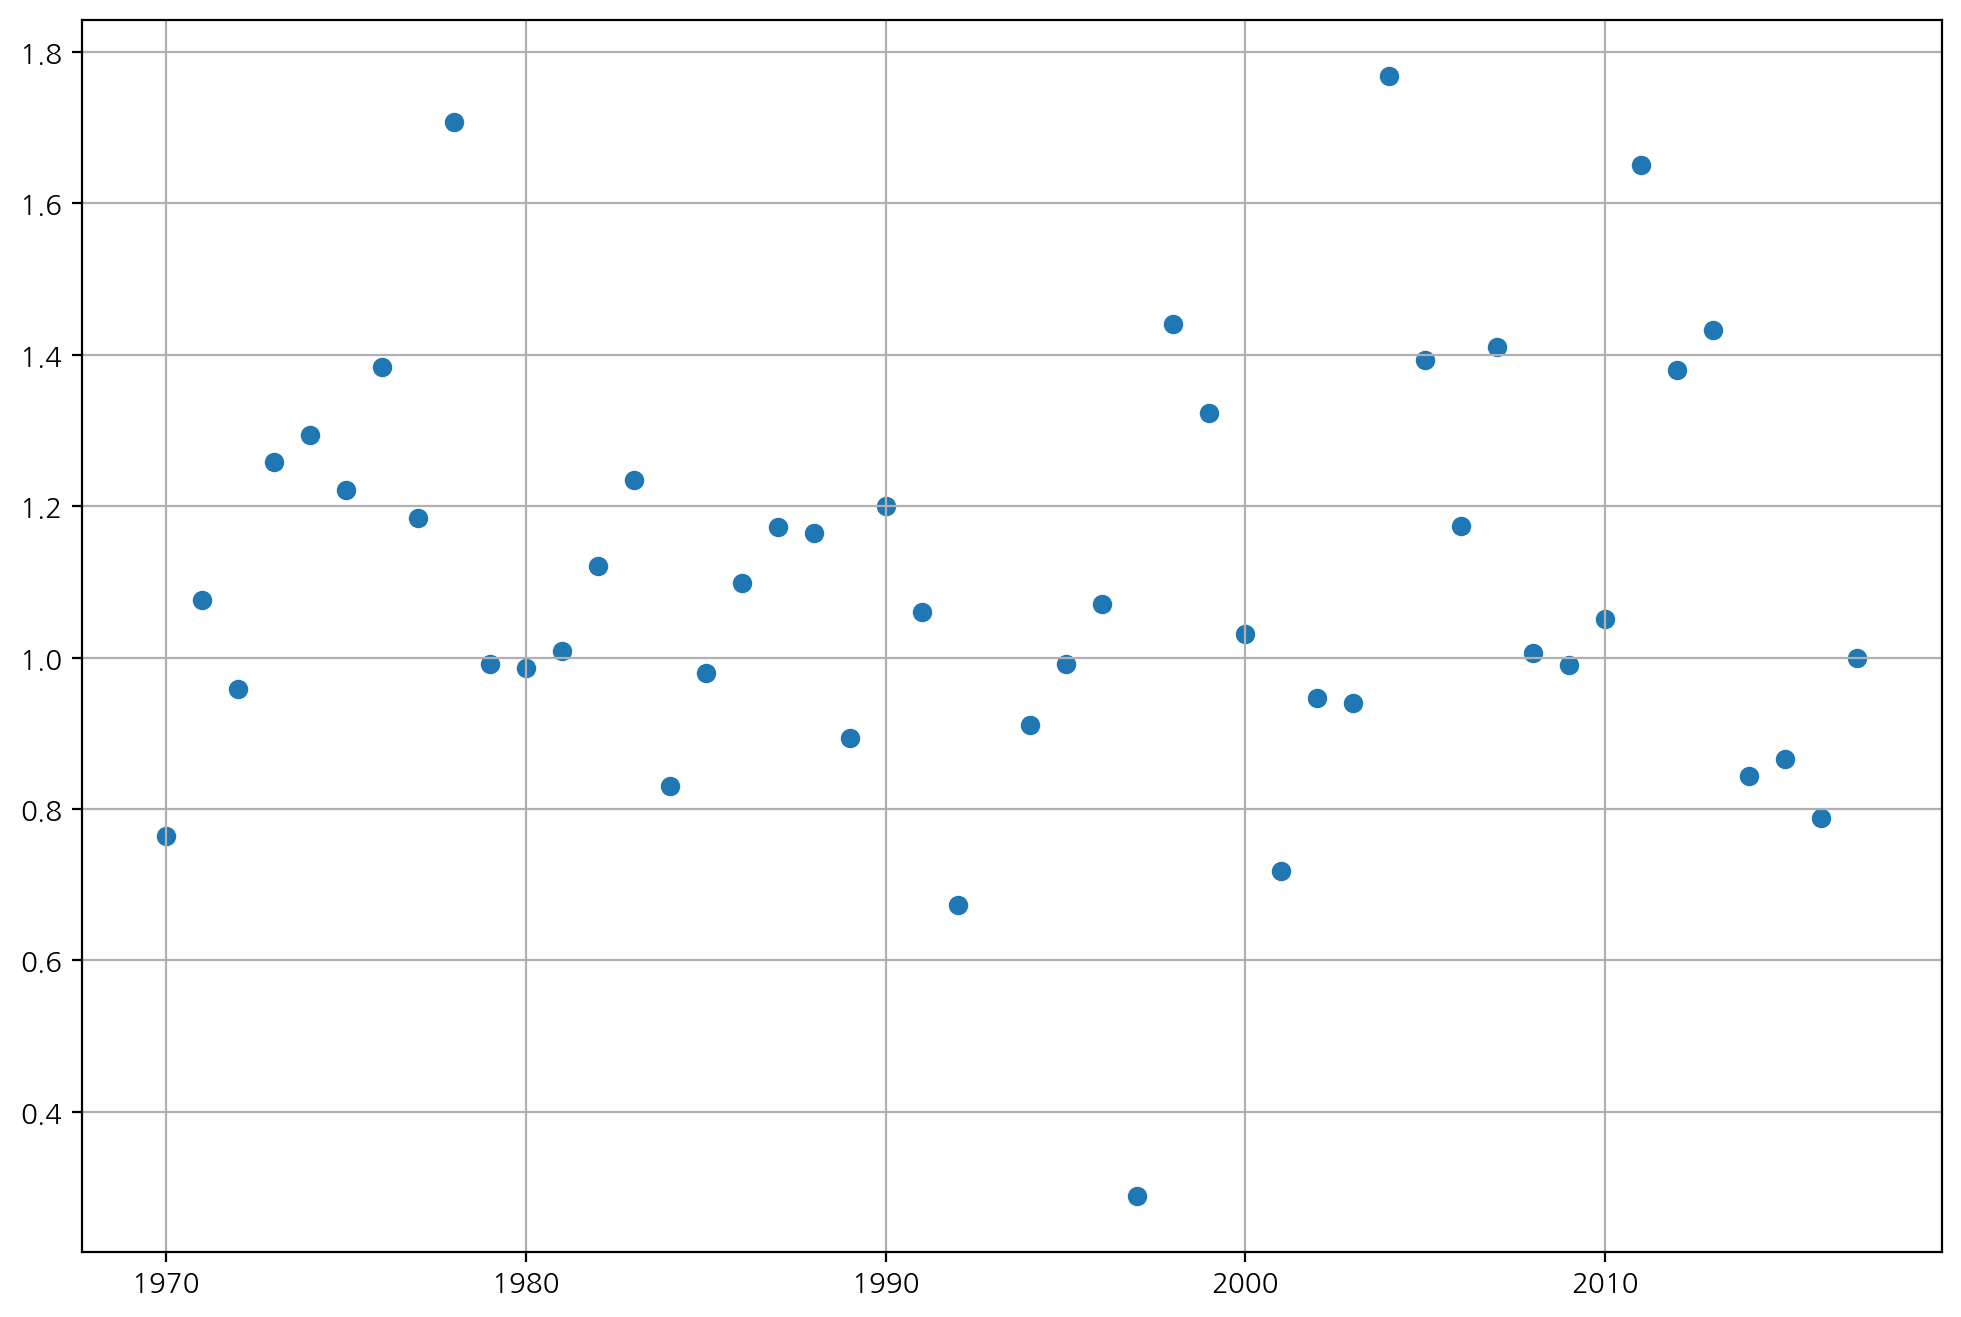

In [87]:
plt.figure(figsize=(12, 8))
plt.scatter(step1_pivot.index, step1_pivot["증가율"])
plt.grid(True)
plt.show()

## step2

- 나라별 테러 건수 가져오기

In [93]:
step2_df = terror_data[['country', 'country_txt']]
step2_df

,country,country_txt
0,58,Dominican Republic
1,130,Mexico
2,160,Philippines
3,78,Greece
4,101,Japan
...,...,...
181686,182,Somalia
181687,200,Syria
181688,160,Philippines
181689,92,India


- 나라별로 건수 합쳐주기

In [94]:
step2_pivot = pd.pivot_table(data=step2_df, index = "country_txt", aggfunc=np.sum)
step2_pivot

,country
country_txt,
Afghanistan,50924
Albania,400
Algeria,16458
Andorra,7
Angola,3992
...,...
Yemen,763116
Yugoslavia,47705
Zaire,30200


- 가장 많이 일어난 나라 순서대로 정렬

In [95]:
step2_pivot = step2_pivot.sort_values("country",ascending=False).head(20)
step2_pivot

,country
country_txt,
United Kingdom,3156705
Iraq,2340420
Pakistan,2198304
Philippines,1105280
India,1100320
Peru,969264
Turkey,897028
Thailand,789045
Yemen,763116


- 시각화
    - 영국이 제일 많이 발생했기 때문에 왜 그런가 분석
    

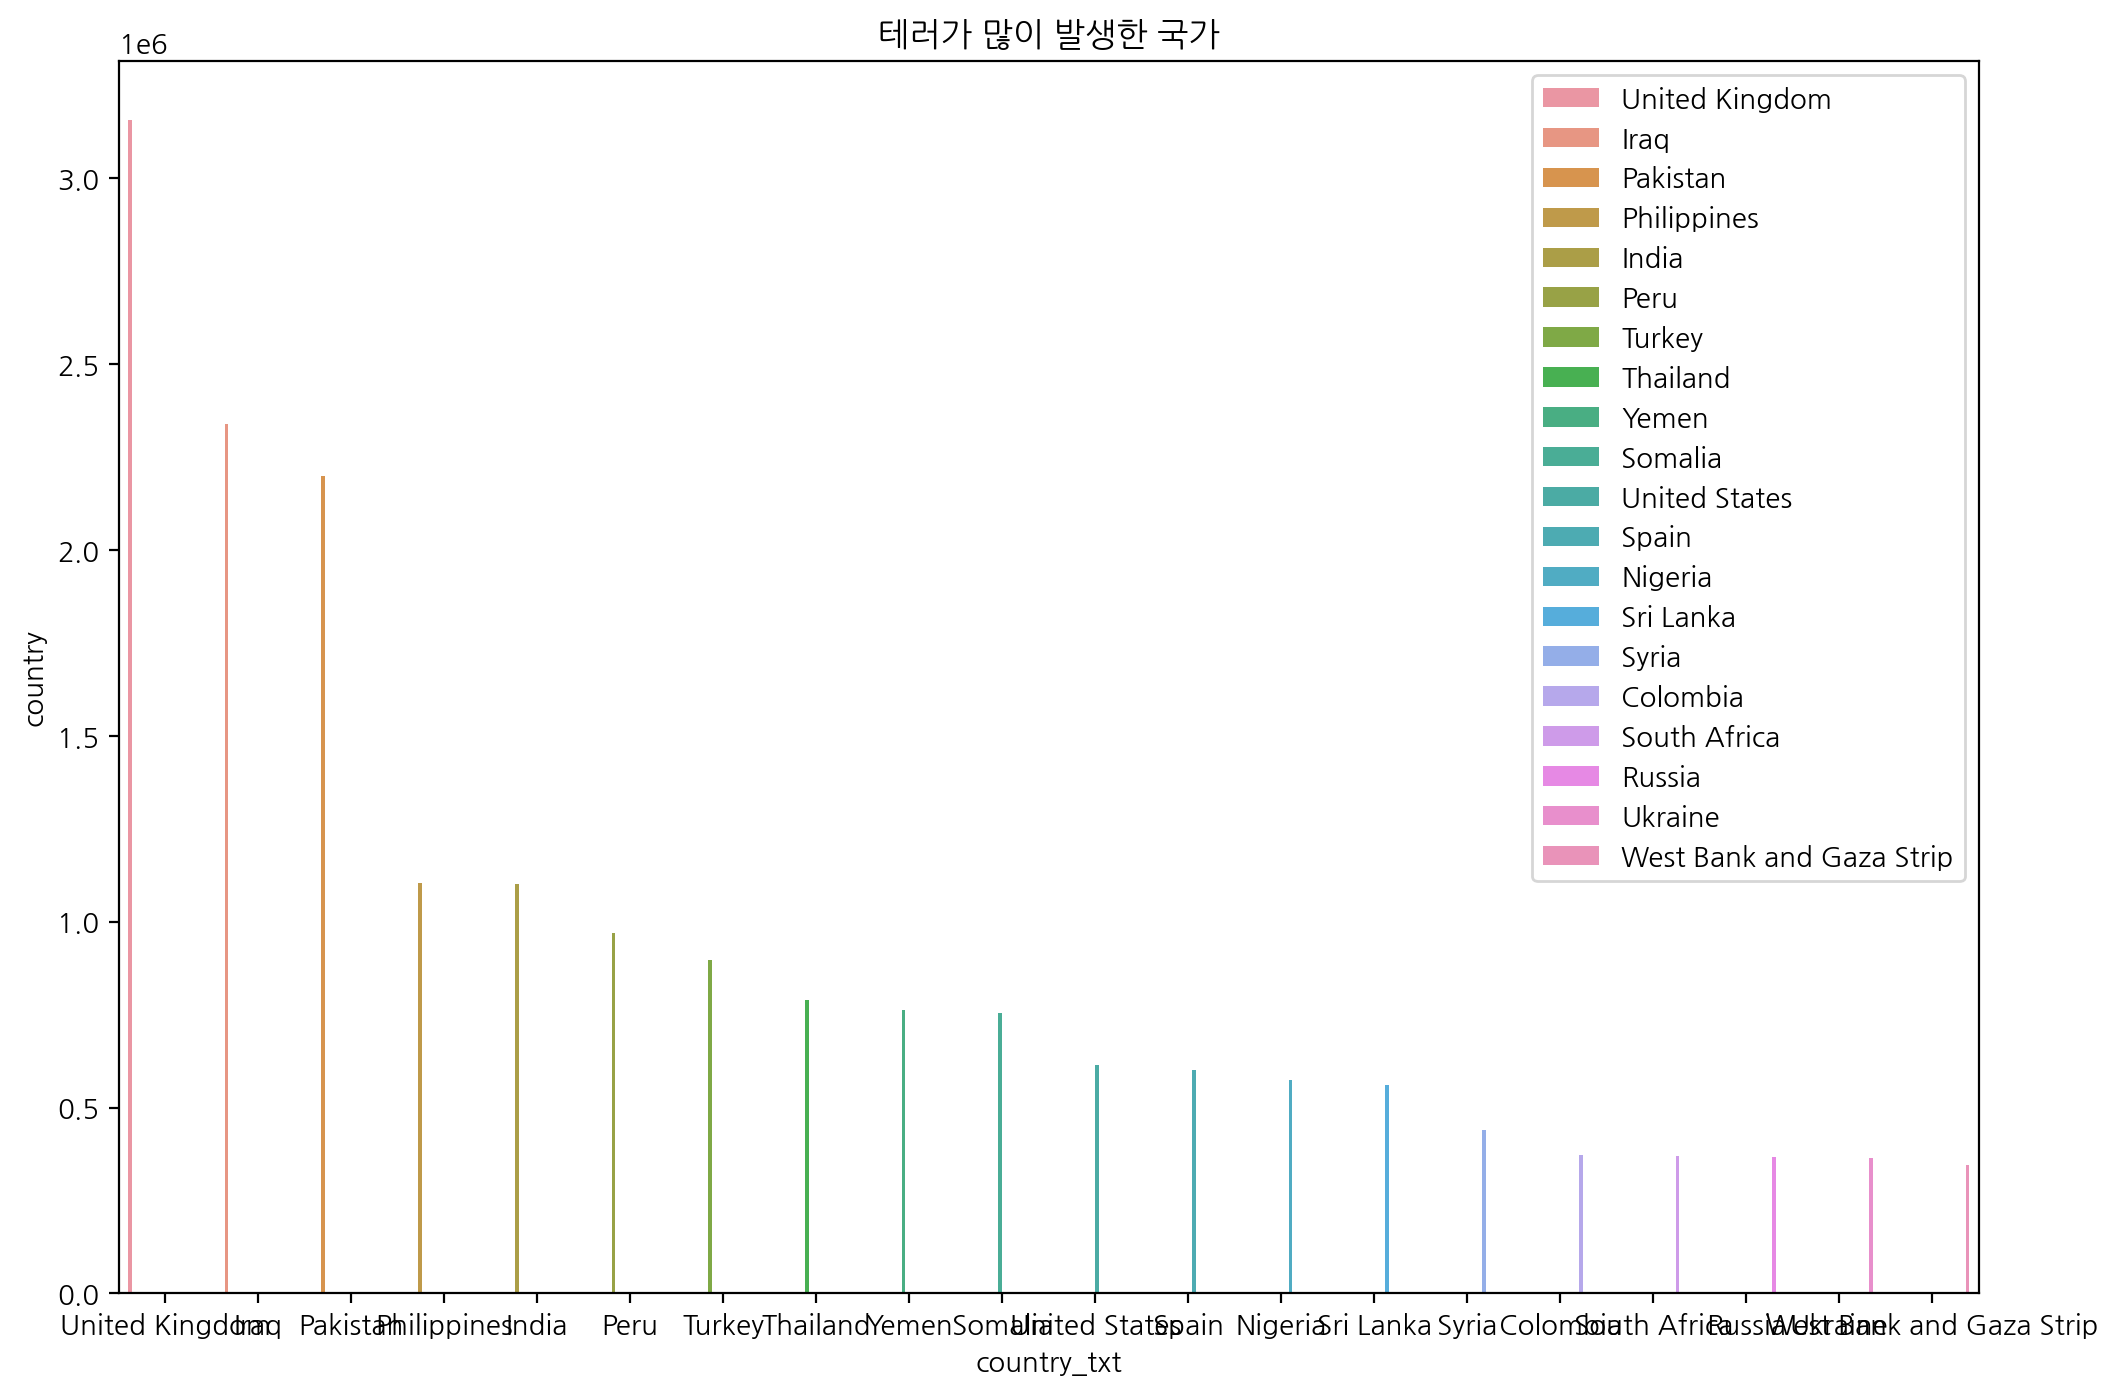

In [96]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.barplot(x="country_txt", y="country", hue="country_txt", data=step2_pivot.reset_index())
plt.title("테러가 많이 발생한 국가")
plt.legend(loc="upper right")
plt.show();

- 나라별 각 해에 발생한 테러 건수 조사

In [97]:
df = terror_data[["iyear", "country_txt", "country"]]
df_pivot = pd.pivot_table(data=df, index = ("country_txt", "iyear"), aggfunc=np.sum)
df_pivot

country
country_txt iyear         
Afghanistan 1973         4
            1979        12
            1987         4
            1988        44
            1989        40
...                    ...
Zimbabwe    2010       231
            2011       231
            2013       693
            2014       231
            2017       693

[3762 rows x 1 columns]

- 영국과 이라크의 연도별 테러 건수 시각화
    - 위가 영국 아래가 이라크

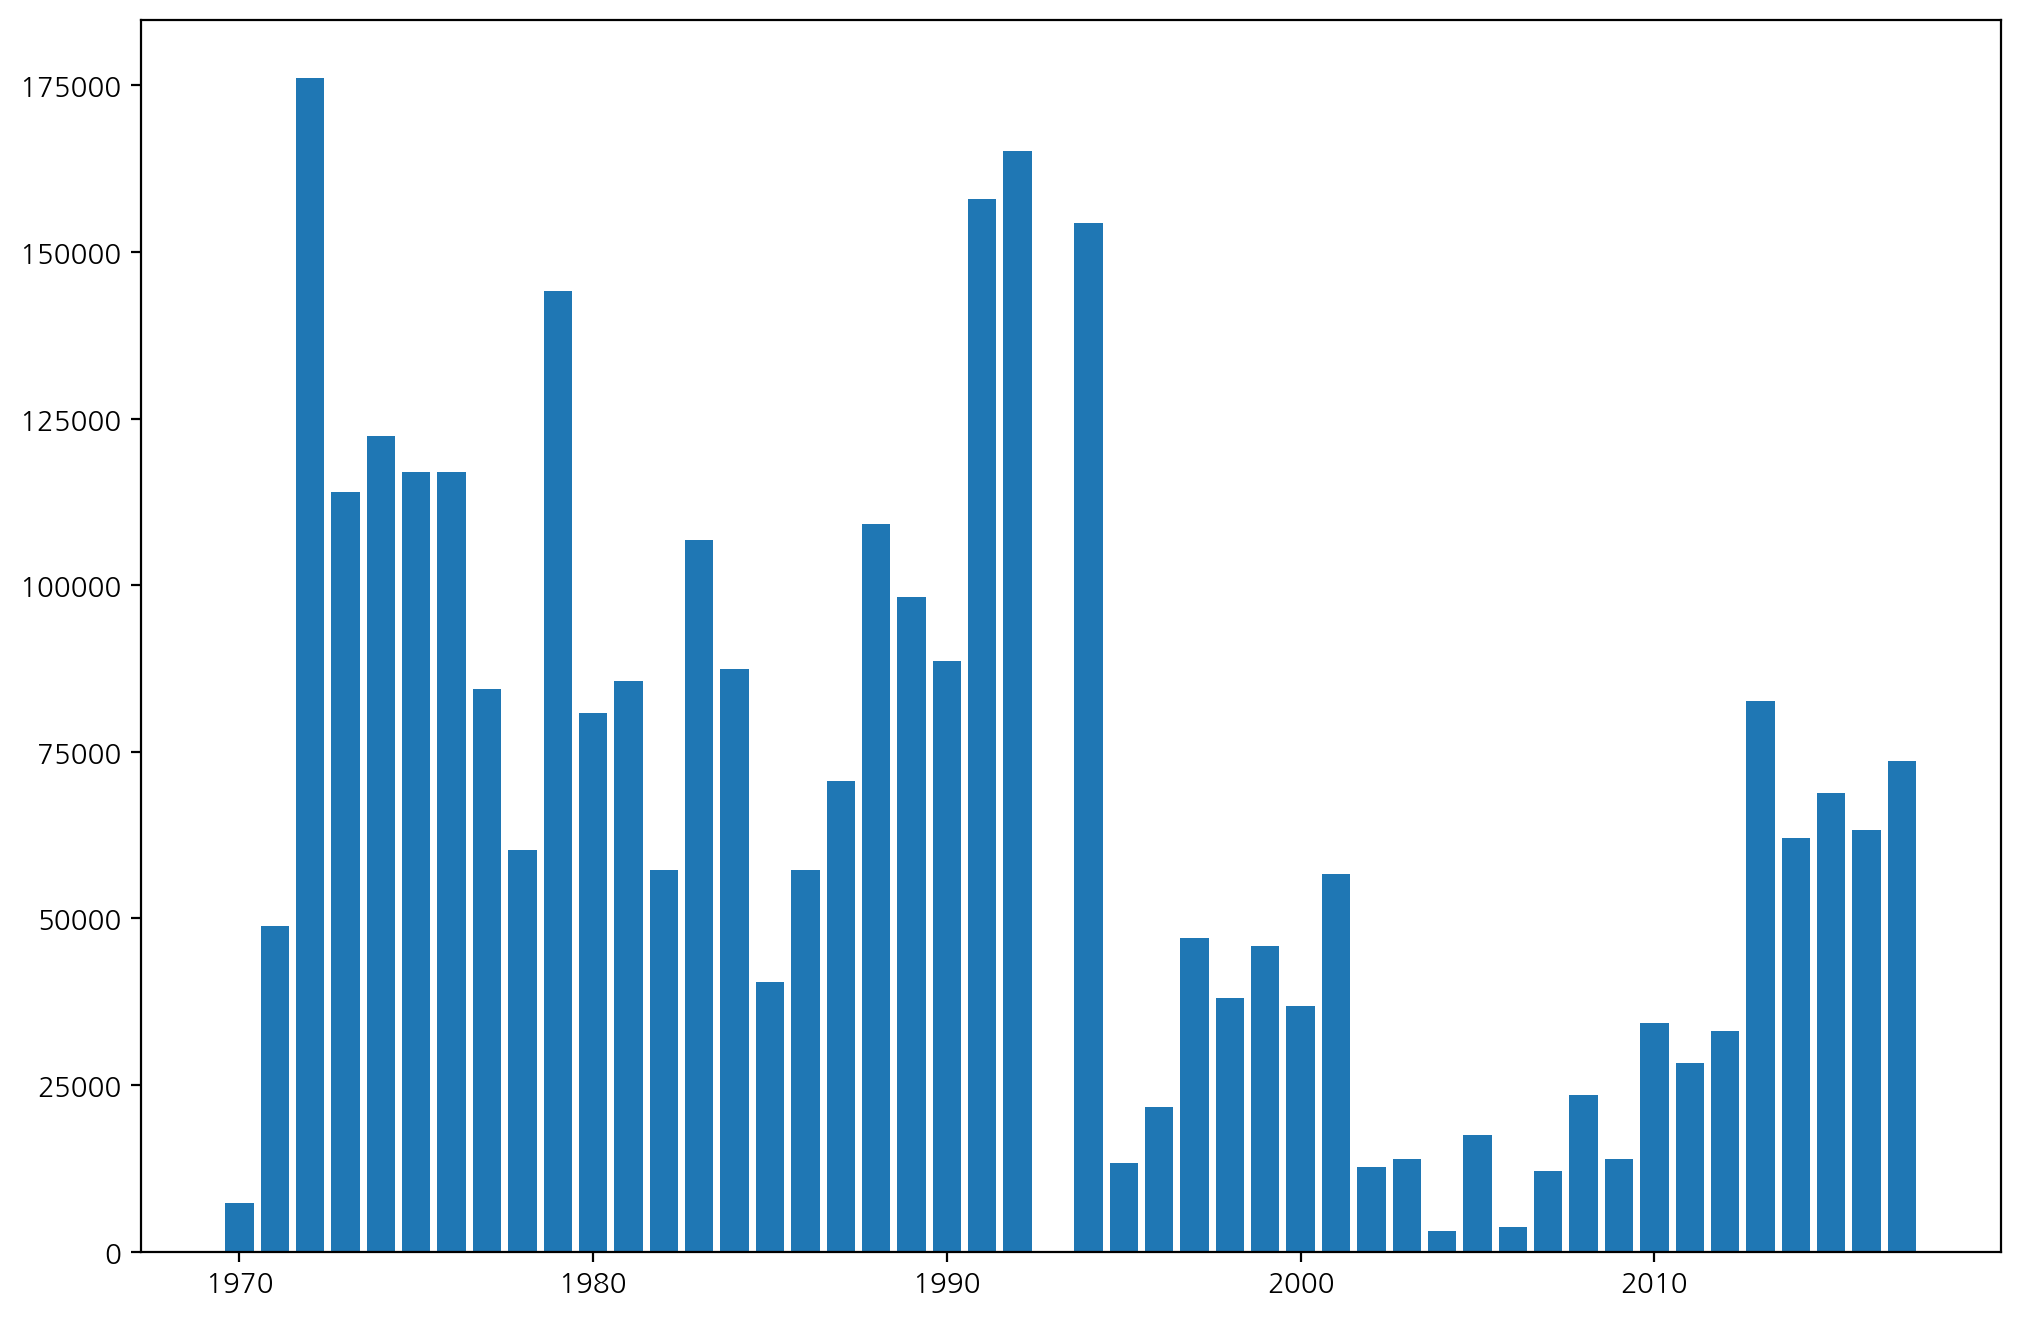

In [100]:
uk_terror = df_pivot.loc["United Kingdom"]
iraq_terror = df_pivot.loc["Iraq"]
plt.figure(figsize=(12,8))
plt.bar(uk_terror.index, uk_terror["country"])
plt.show();

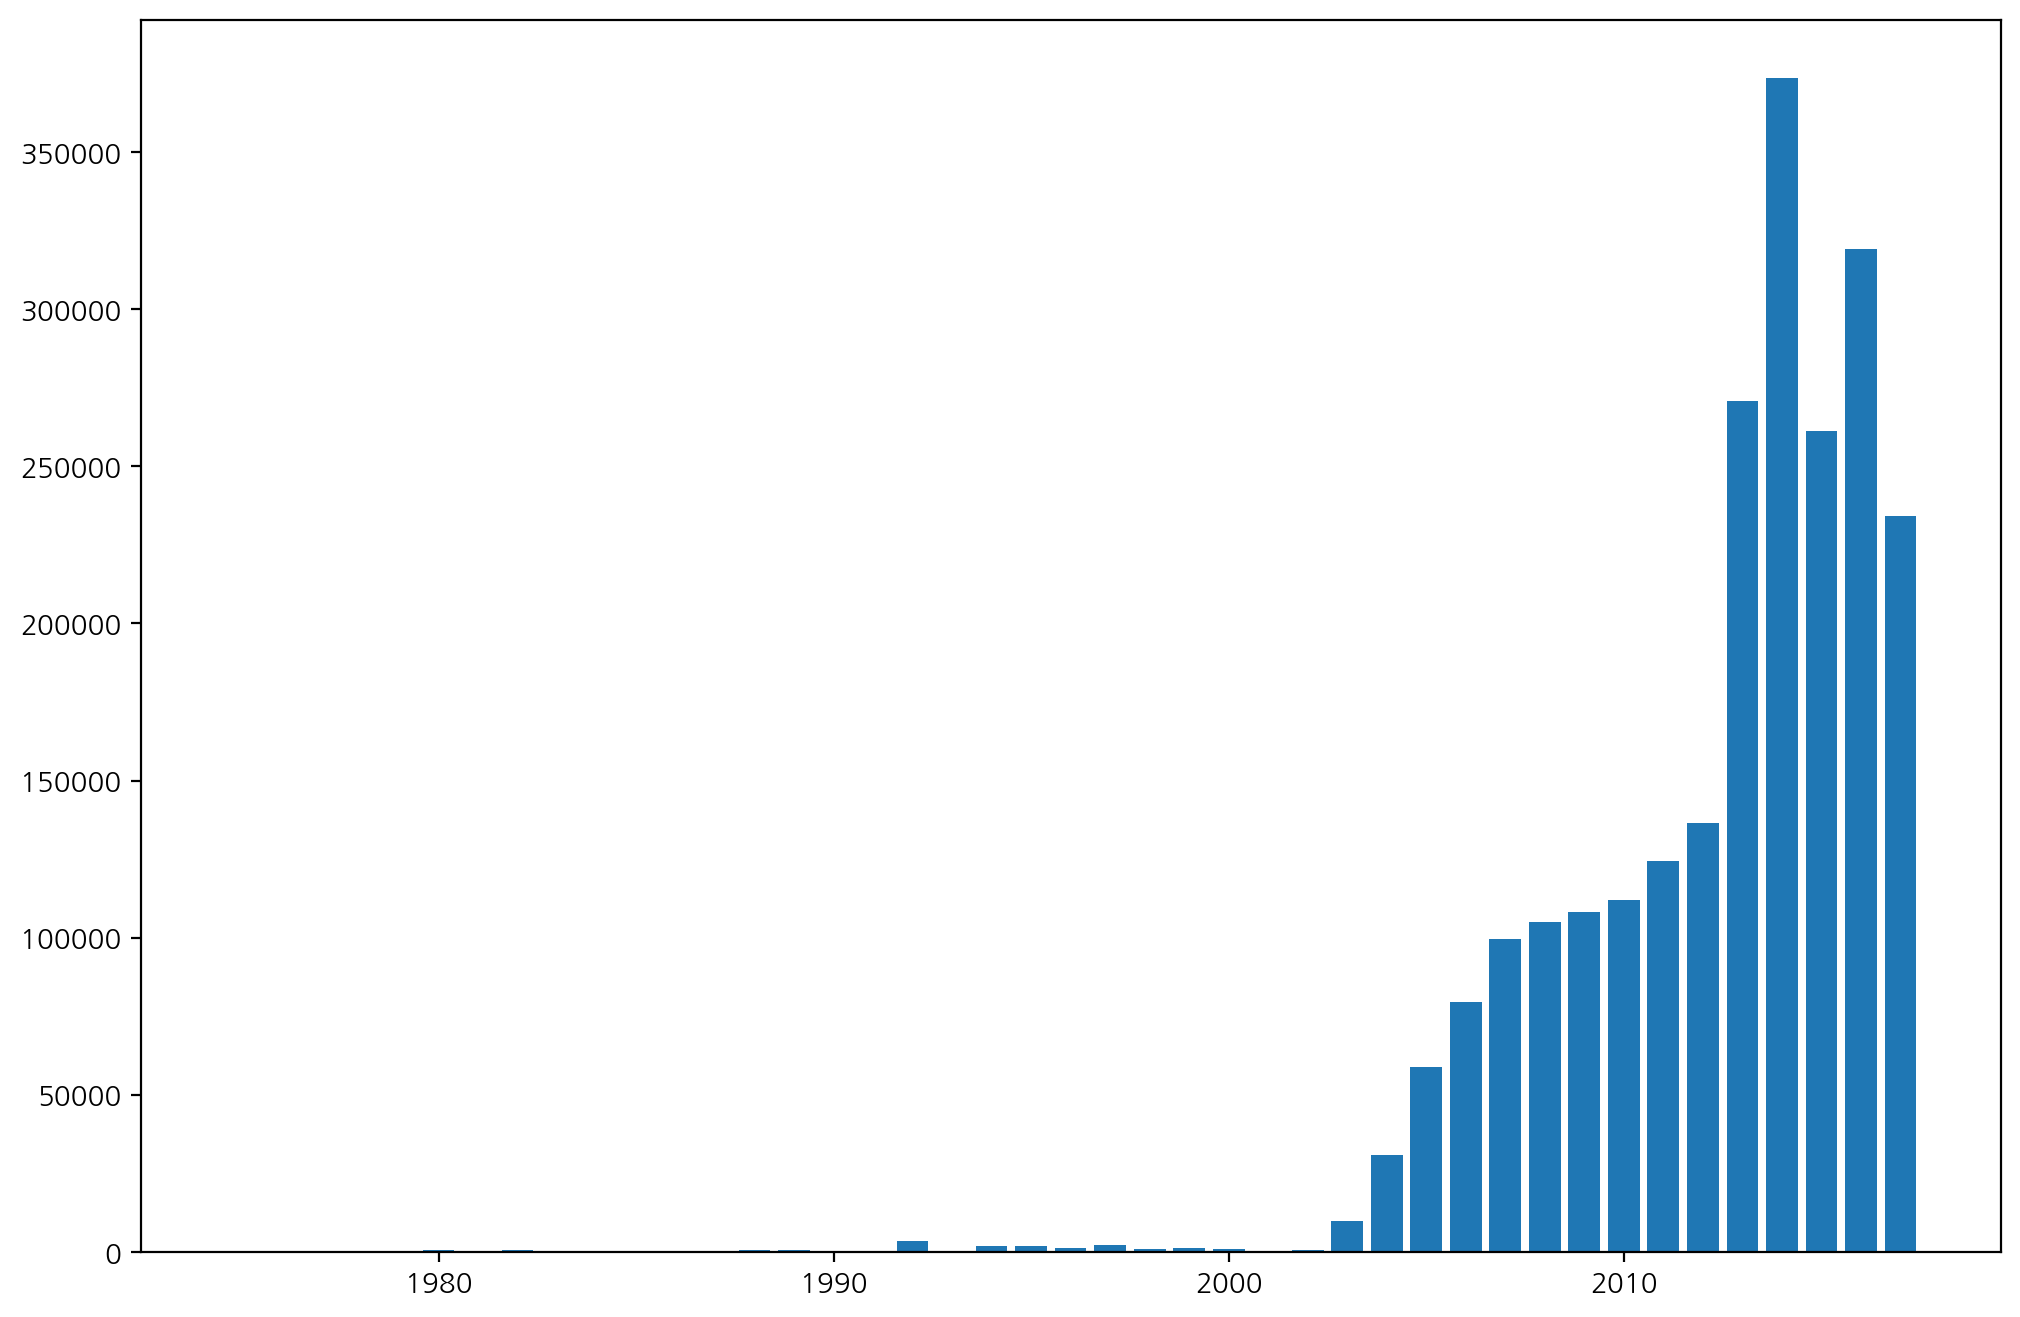

In [101]:
plt.figure(figsize=(12,8))
plt.bar(iraq_terror.index, iraq_terror["country"])
plt.show();

## step3

- 2004년을 기점으로 이전과 이후의 테러 경향 비교

- 테러 방법을 비교하는 코드
    - 테러 발생국, 테러 대상 모두 같은 방법을 사용하였다

- 연도별로 각각의 테러 방법들에 대해 피봇 테이블 만듬

In [ ]:
step3_df = terror_data[['iyear', 'attacktype1_txt', 'attacktype1']]
step3_pivot = pd.pivot_table(data=step3_df, index=("iyear", "attacktype1_txt"),  aggfunc=np.sum)

- 2003년 이전의 데이터를 따로 분리하여 전처리 한뒤
- 제일 많이 사용된 테러 방법 5개만 추출

In [240]:

step3_df = step3_pivot.loc["1970":"2003"].reset_index()
step3_df = step3_df.drop("iyear", axis =1)
step3_pivot = pd.pivot_table(data=step3_df, index=step3_df["attacktype1_txt"], aggfunc=np.sum)
before_targt = step3_pivot.sort_values("attacktype1", ascending=False).iloc[0:5]
before_targt

,attacktype1
attacktype1_txt,
Bombing/Explosion,97407
Armed Assault,36018
Facility/Infrastructure Attack,35553
Unknown,25299
Hostage Taking (Kidnapping),21144


- 이하동문

In [241]:
step3_df = terror_data[['iyear', 'attacktype1_txt', 'attacktype1']]
step3_pivot = pd.pivot_table(data=step3_df, index=("iyear", "attacktype1_txt"),  aggfunc=np.sum)
step3_df = step3_pivot.loc["2004":"2017"].reset_index()
step3_df = step3_df.drop("iyear", axis =1)
step3_pivot = pd.pivot_table(data=step3_df, index=step3_df["attacktype1_txt"], aggfunc=np.sum)
after_targt = step3_pivot.sort_values("attacktype1", ascending=False).iloc[0:5]
after_targt

,attacktype1
attacktype1_txt,
Bombing/Explosion,167358
Armed Assault,49320
Hostage Taking (Kidnapping),45804
Unknown,40185
Facility/Infrastructure Attack,36939


- 시각화

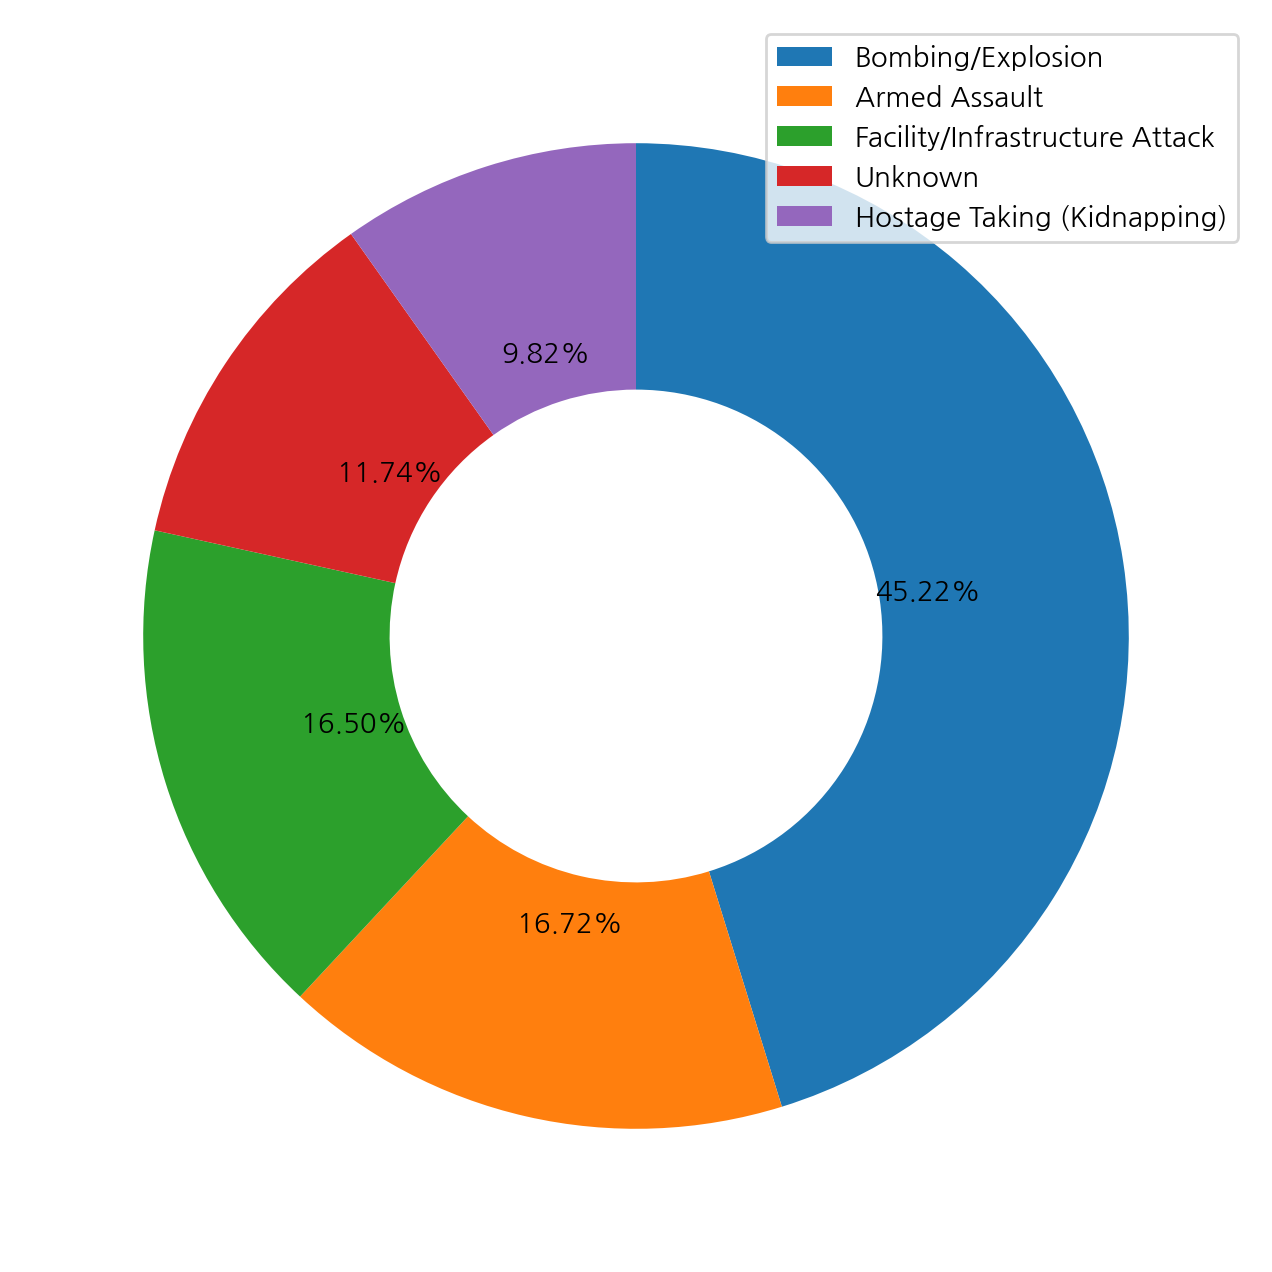

In [242]:
import matplotlib.pyplot as plt
import numpy as np
 
## 데이터 준비
labels = before_targt.index## 라벨
frequency = before_targt["attacktype1"] ## 빈도
 
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(frequency, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p), ## 퍼센티지 출력
       wedgeprops=dict(width=0.5) ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
       )
plt.legend(pie[0],labels) ## 범례 표시
plt.show()


- 사상자 수 조사
    - nkiis 컬럼과 nwound 컬럼을 합해줌

In [ ]:
step3_df = terror_data[['iyear', 'nkill', 'nwound']]
step3_df["casualties"] = step3_df["nkill"] + step3_df["nwound"]

- 필요없는 것들은 버리고

In [ ]:
step3_df.drop(["nwound", "nkill"], axis=1, inplace=True)

- 연도에 따른 사상자 수들로 피봇 테이블

In [234]:
step3_pivot = pd.pivot_table(data=step3_df, index="iyear", aggfunc=np.sum)
step3_pivot

,casualties
iyear,
1970,367.0
1971,119.0
1972,602.0
1973,621.0
1974,1122.0
1975,781.0
1976,1158.0
1977,874.0
1978,2664.0


- 2004년 이전과 이후의 사상자들을 비교해봄

In [236]:
step3_pivot.loc["1970":"2003"].sort_values("casualties", ascending=False)

,casualties
iyear,
2001,29662.0
1995,20233.0
1992,19610.0
1997,19468.0
1996,17383.0
1991,15961.0
1984,15462.0
1994,14663.0
1988,14014.0


- scatter로 시각화

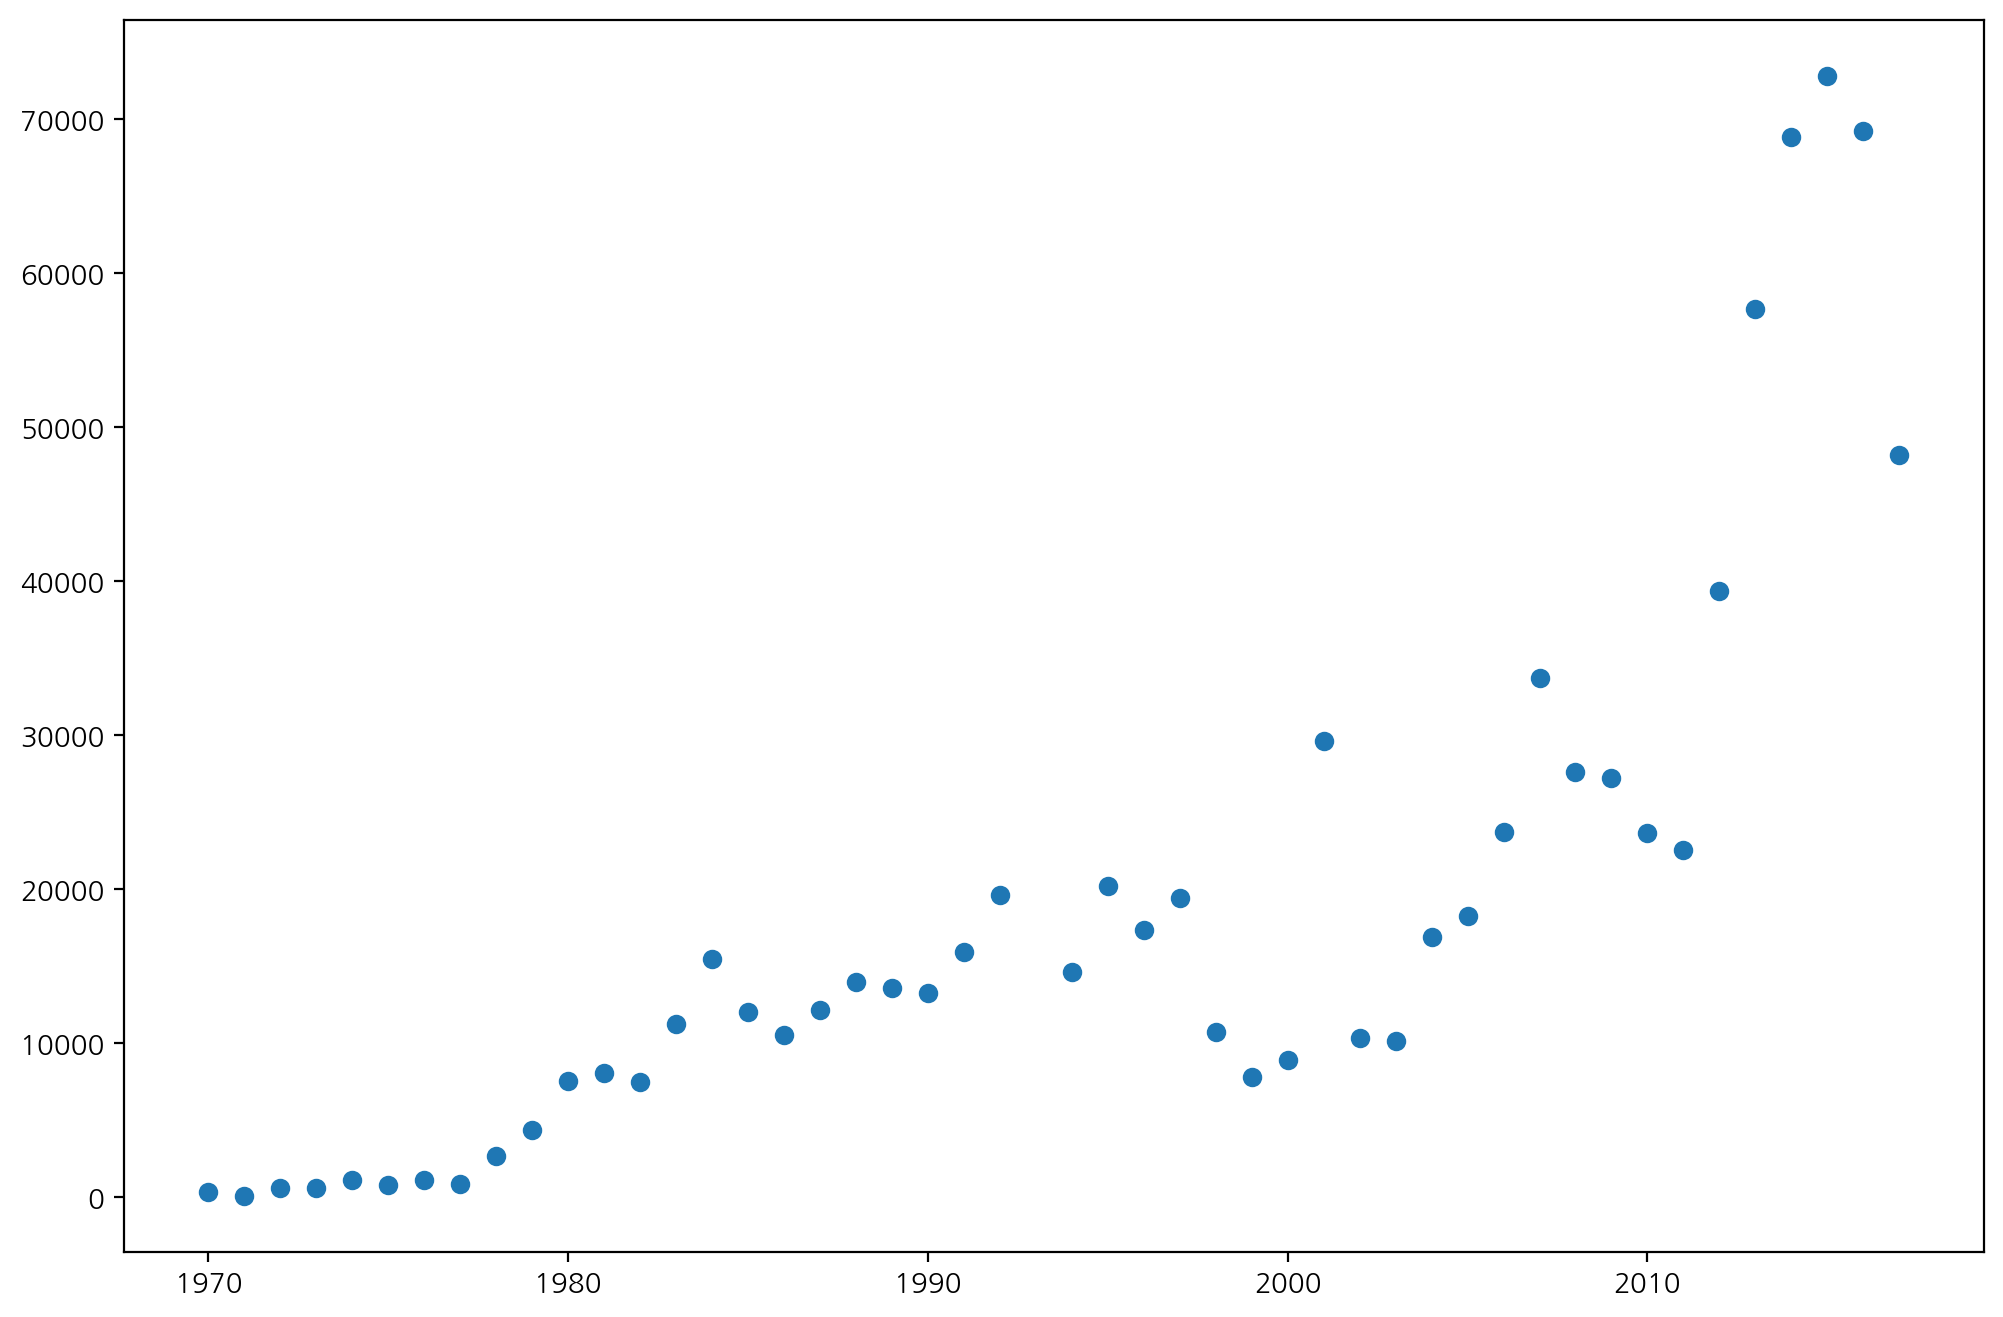

In [238]:
plt.figure(figsize=(12,8))
plt.scatter(step3_pivot.index, step3_pivot["casualties"])
plt.show()

## step4
- 4개 지역간 테러 경향 비교

- 지역별 사상자 수 집계
- 지역별 테러 발생 건수도 같은 방법으로 진행

In [104]:
step4_df = terror_data[['region_txt', 'nkill', 'nwound']]
step4_df["casualities"] = step4_df["nkill"] + step4_df["nwound"]
step4_df.drop(["nkill", "nwound"], axis=1, inplace=True)
step4_pivot = pd.pivot_table(data=step4_df, index=("region_txt"), aggfunc=np.sum)
step4_pivot

/tmp/ipykernel_17678/889170860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  step4_df["casualities"] = step4_df["nkill"] + step4_df["nwound"]
/tmp/ipykernel_17678/889170860.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  step4_df.drop(["nkill", "nwound"], axis=1, inplace=True)


,casualities
region_txt,
Australasia & Oceania,409.0
Central America & Caribbean,34530.0
Central Asia,2969.0
East Asia,10003.0
Eastern Europe,18239.0
Middle East & North Africa,329807.0
North America,26398.0
South America,43562.0
South Asia,234366.0


- 이 중에서 4개 지역만 인덱싱

In [321]:
step4_pivot = step4_pivot.loc[["Western Europe", 
                              "Middle East & North Africa",
                               "South America",
                                "Southeast Asia"]]
step4_pivot

,casualities
region_txt,
Western Europe,22778.0
Middle East & North Africa,329807.0
South America,43562.0
Southeast Asia,40841.0


- seaborn으로 시각화

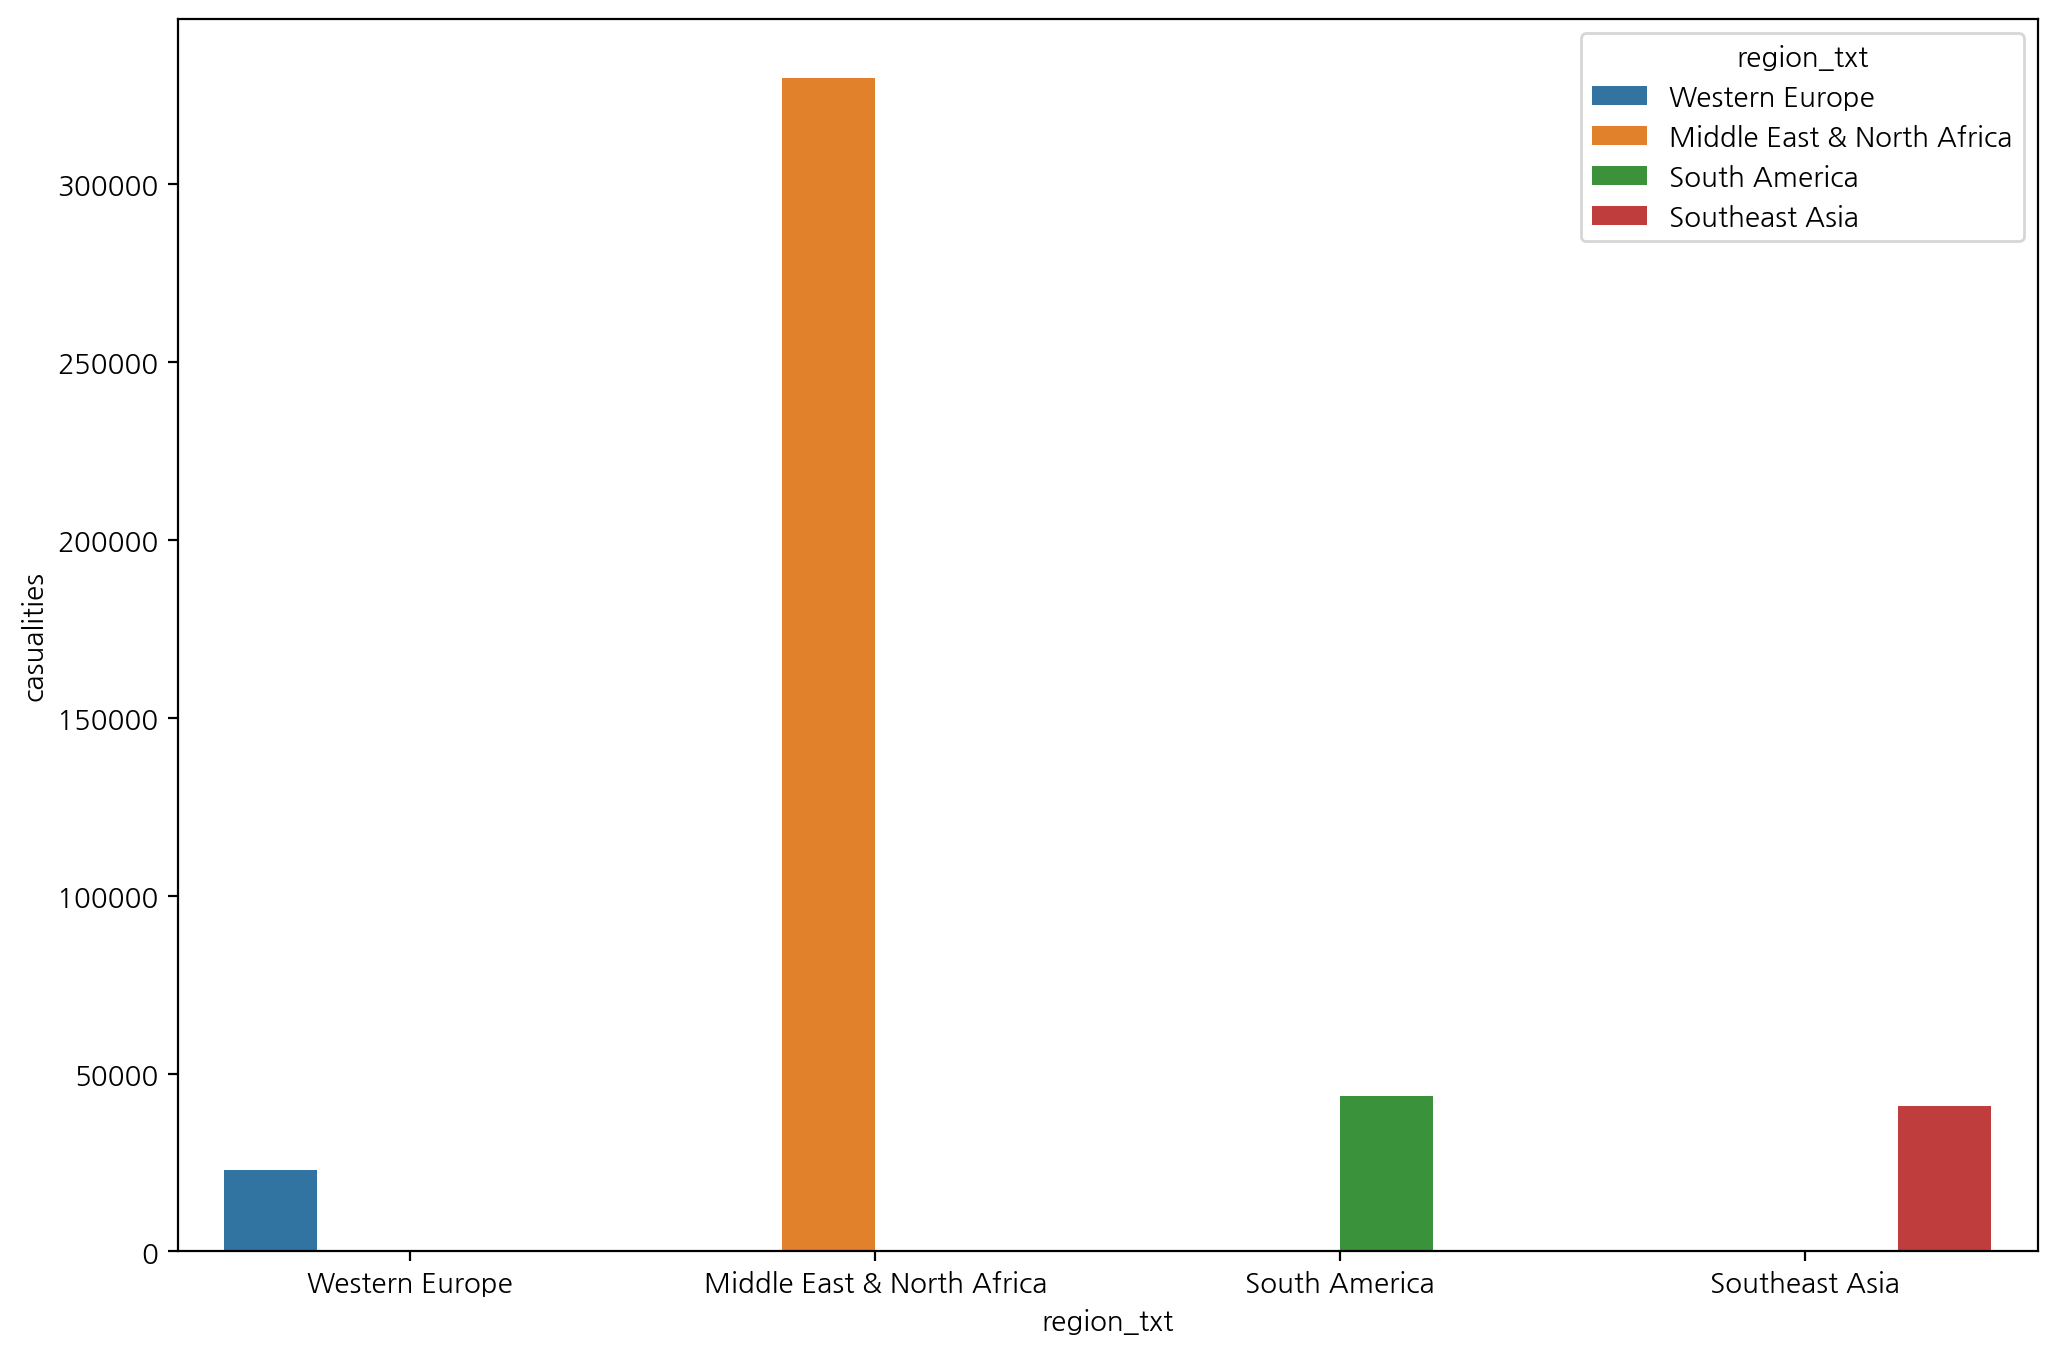

In [324]:
step4_pivot = step4_pivot.reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x=step4_pivot["region_txt"], y=step4_pivot["casualities"], hue= step4_pivot["region_txt"])
plt.show()

- 지역별 테러 방법 비교(ex 남동아시아)
    - 지역별 테러 방법 집계화
    - 서유럽, 남아메리카, 중동&북아프리카도 동일한 방법으로 진행

In [109]:
step4_df = terror_data[['region_txt', 'attacktype1_txt', 'attacktype1']]
step4_pivot = pd.pivot_table(data=step4_df, index=("region_txt", "attacktype1_txt"), aggfunc=np.sum)
step4_pivot

attacktype1
region_txt            attacktype1_txt                                 
Australasia & Oceania Armed Assault                                102
                      Assassination                                 36
                      Bombing/Explosion                            225
                      Facility/Infrastructure Attack               497
                      Hijacking                                     12
...                                                                ...
Western Europe        Hijacking                                    268
                      Hostage Taking (Barricade Incident)          445
                      Hostage Taking (Kidnapping)                 1614
                      Unarmed Assault                             1184
                      Unknown                                     2385

[108 rows x 1 columns]


- 남동아시아만 인덱싱

In [111]:
se_asia = step4_pivot.loc["Southeast Asia"]
se_asia

,attacktype1
attacktype1_txt,
Armed Assault,8044
Assassination,1369
Bombing/Explosion,14454
Facility/Infrastructure Attack,6636
Hijacking,236
Hostage Taking (Barricade Incident),335
Hostage Taking (Kidnapping),4464
Unarmed Assault,200
Unknown,3897


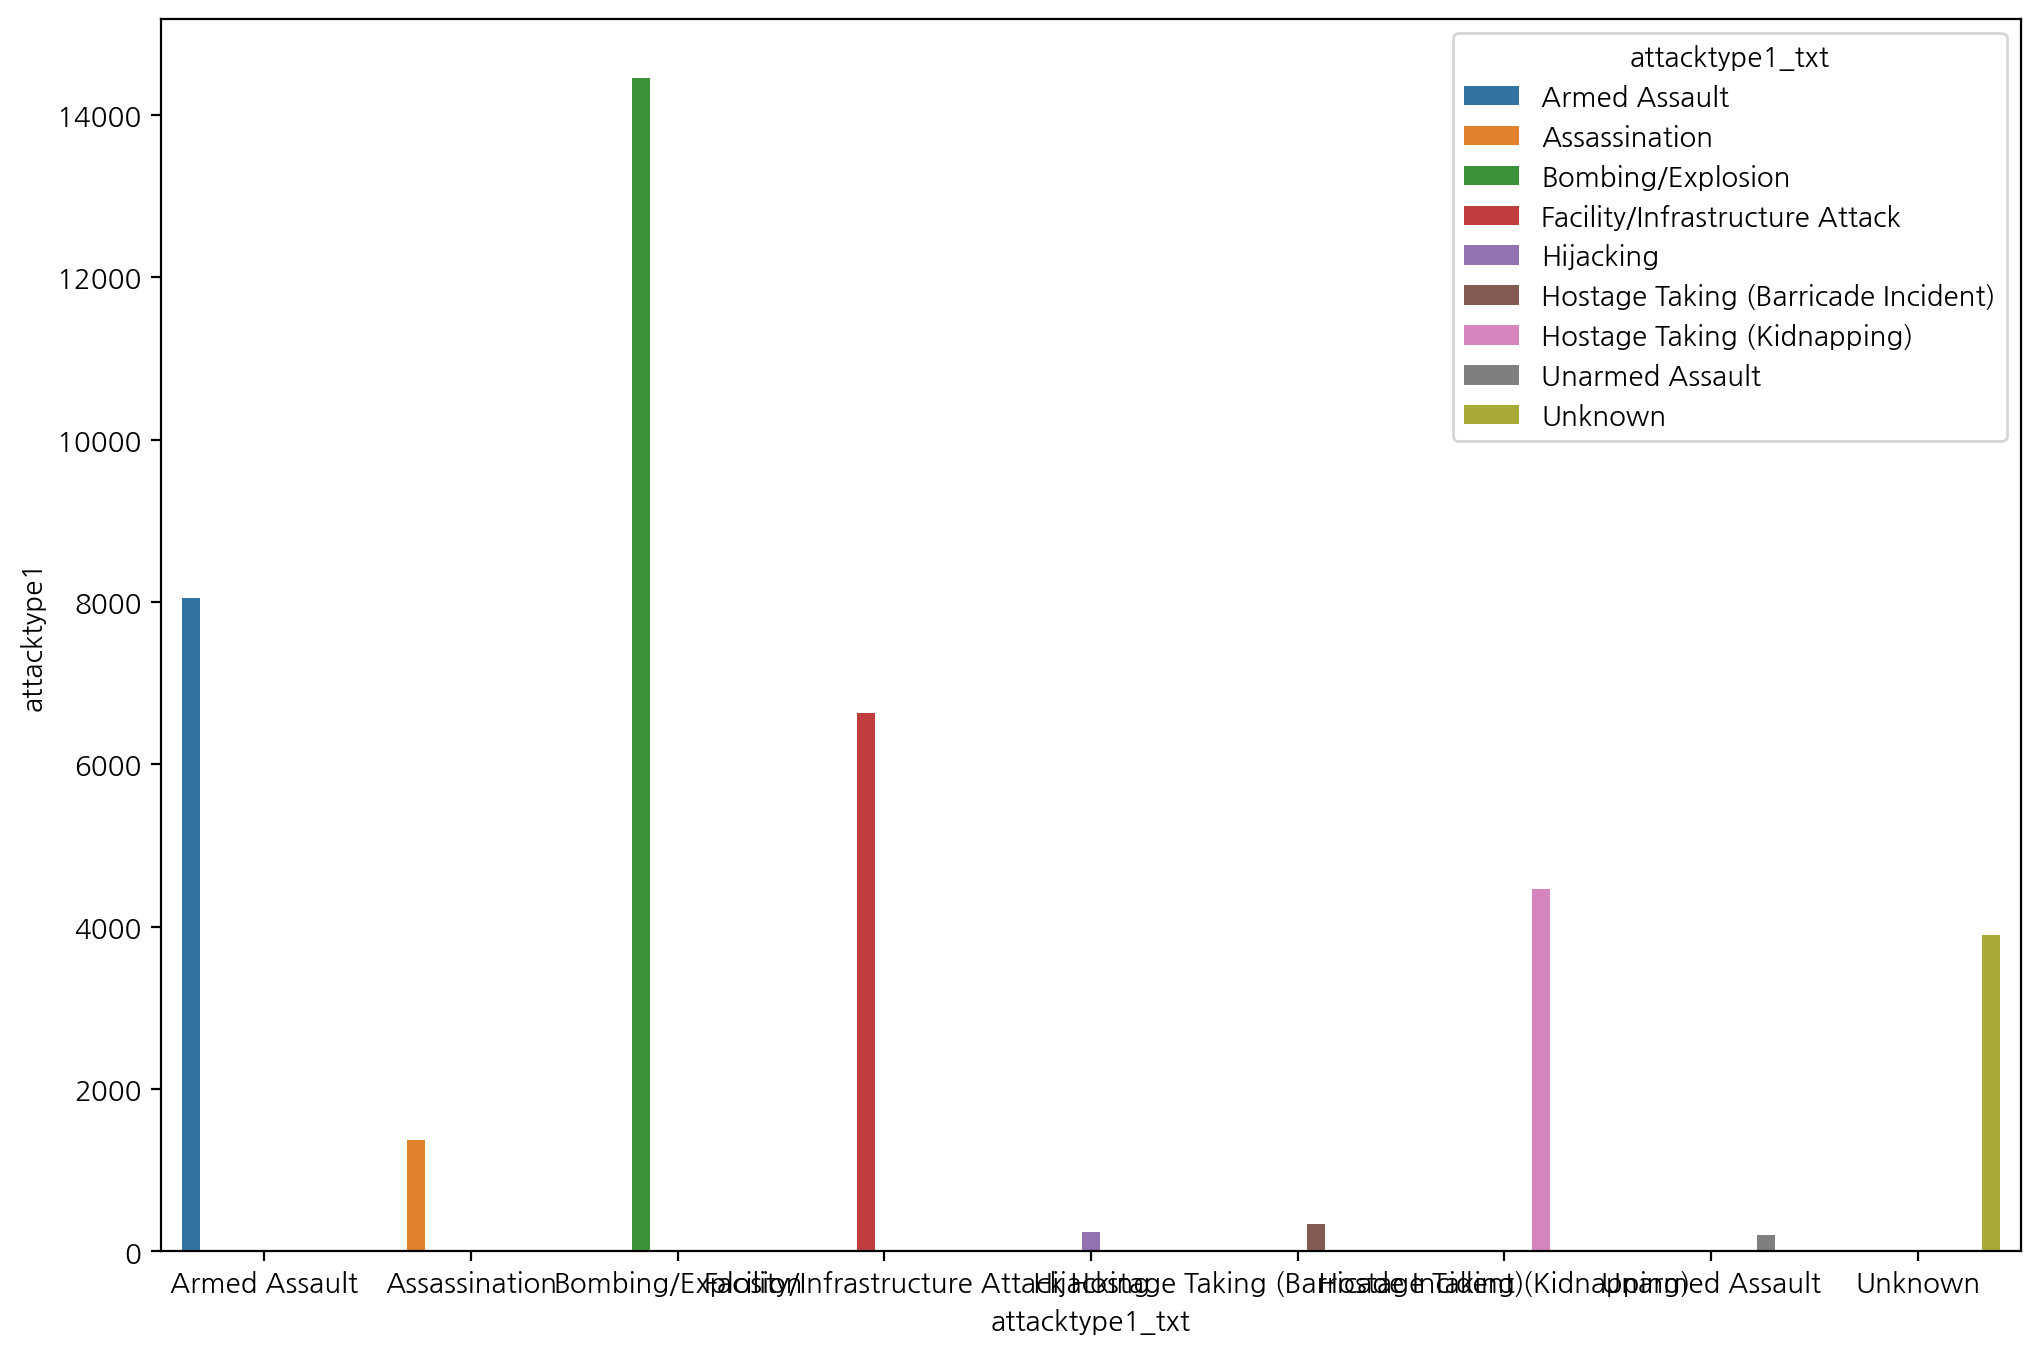

In [112]:
step4_pivot = se_asia.reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x=step4_pivot["attacktype1_txt"], y=step4_pivot["attacktype1"], hue= step4_pivot["attacktype1_txt"])
plt.show()

## step 5
- 테러의 위험성과 악을 잘 보여줄 수 있는 데이터 시각화 방법에 대한 고찰

- wordcloud를 통한 무거운 면 강조

- 테러 방법(글자)과 대상(글자)을 합침

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib
%matplotlib inline

data1 = terror_data["provstate"]
data1.dropna(inplace=True)
# data2 = terror_data["targtype1_txt"]
# data2.dropna(inplace=True)

In [9]:
text =  data1.astype(str) 
# + data2.astype(str)

- 제일 많이 반복되는 글자 순서대로 크게 시각화
- 색깔은 어둡고 무거운 색으로

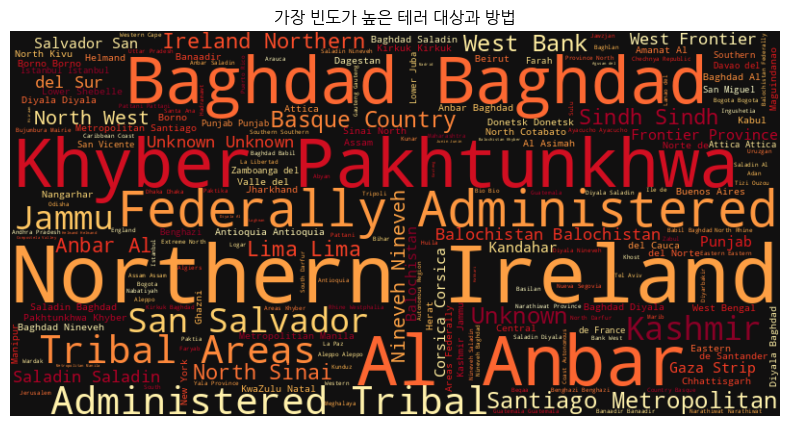

In [10]:
wordcloud = WordCloud(background_color="#111010", max_font_size=150,  colormap="YlOrRd", width=800, height=400).generate(' '.join(text))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('가장 빈도가 높은 테러 대상과 방법')
plt.show();